# Playground 

A place to quickly test and experiment.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import scipy.special as sp
import sys

from matplotlib import rc
rc('text', usetex=True)

### Bessel Functions

First kind of real order and complex argument.

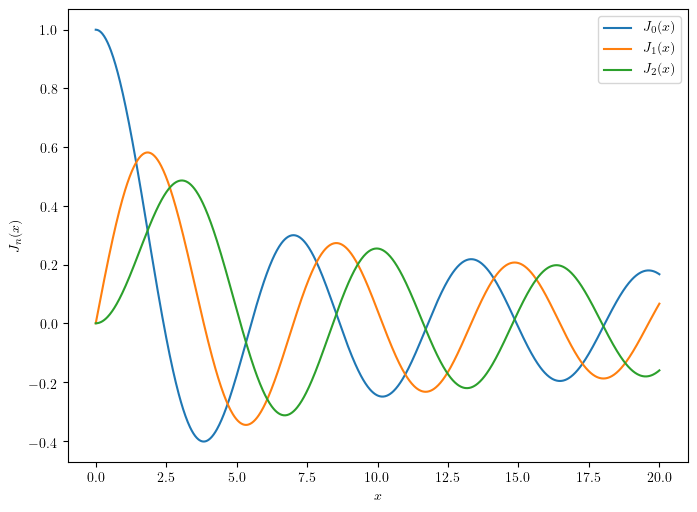

In [2]:
x = np.linspace(0,20,1000)

fig = plt.figure(figsize=(8,6), dpi= 100)

for a in range(0,3):
    plt.plot(x, sp.jv(a,x), label=f'$J_{a}(x)$')
    
plt.xlabel('$x$')
plt.ylabel('$J_n(x)$')
plt.legend()

plt.show()

Second kind of real order and complex argument.

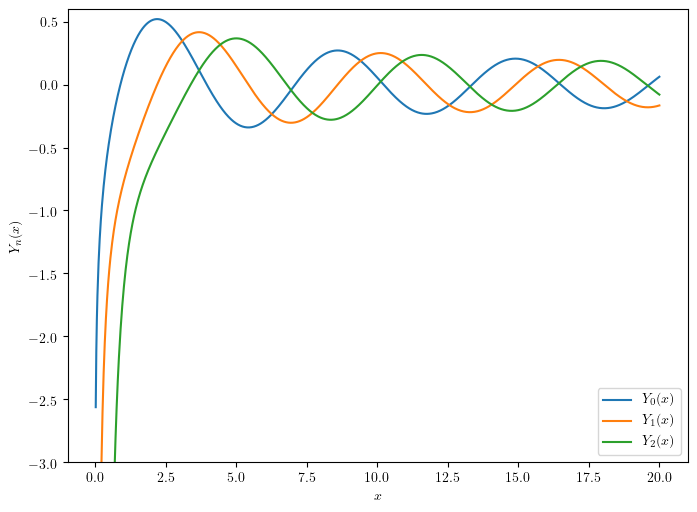

In [4]:
fig = plt.figure(figsize=(8,6), dpi= 100)

for a in range(0,3):
    plt.plot(x, sp.yn(a,x), label=f'$Y_{a}(x)$')

plt.xlabel('$x$')
plt.ylabel('$Y_n(x)$')

plt.ylim((-3, 0.6))

plt.legend()

plt.show()

### Derivatives using FFT

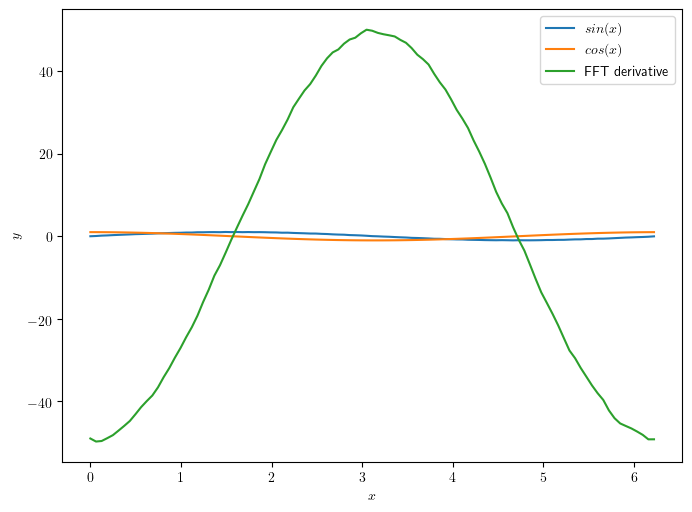

In [58]:
# create "artificial" data

N = 101
L = 2 * np.pi

x = np.arange(0., L, L/float(N))
y = np.sin(x) + 0.05 * np.random.random(np.shape(x)) # artificial data

dy_analytical = np.cos(x) # exact derivative

if N % 2 == 0:
    k = np.arange(-N/2 + 1, N/2 + 1, 1)
#     k = np.asarray([range(0, int(N / 2)), range(-int(N / 2 + 1),0)])
#     k = np.asarray([range(0, int(N / 2))] + [range(-int(N / 2) + 1,0)])
else:
    k = np.arange(-(N - 1) / 2, ((N - 1) / 2) + 1, 1)
#     k = np.asarray([range(0,int((N - 1) / 2)), range(-int((N - 1) / 2), 0)])
#     k = np.asarray([range(0,int((N - 1) / 2))] + [range(-int((N - 1) / 2), 0)])
    
# k = k.astype('float64') 

k *= 2 * np.pi / L

fftd = np.real(np.fft.ifft(1.0j * k * np.fft.fft(y))) # FFT derivative


# Plot 

fig = plt.figure(figsize=(8,6), dpi=100)

plt.plot(x, y, label = '$sin(x)$')
plt.plot(x, dy_analytical, label = "$cos(x)$")
plt.plot(x, fftd, label = "FFT derivative")

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()

plt.show()